In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score

In [2]:
df=pd.read_csv(r"Restaurant_Reviews_2.csv")
df.head()

,Review,Liked
0,wow love place,1
1,crust not good,0
2,not tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1


In [3]:
df.shape

(996, 2)

In [4]:
X = df.iloc[:,df.columns!='Liked']
y = df.iloc[:,df.columns=='Liked']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25 , stratify=y, random_state=99)

In [6]:
X_train.shape,X_test.shape

((747, 1), (249, 1))

#### Using W2V

In [7]:
train_corpus = X_train.Review.values.tolist()
test_corpus = X_test.Review.values.tolist()

train_corpus = [sent.split() for sent in train_corpus]
test_corpus = [sent.split() for sent in test_corpus]


In [8]:
train_corpus

[['spaghetti', 'nothing', 'special', 'whatsoever'],
 ['would',
  'say',
  'would',
  'hard',
  'decision',
  'honestly',
  'ms',
  'dish',
  'taste',
  'suppose',
  'taste',
  'amazing'],
 ['love', 'place'],
 ['stop', 'place', 'madison', 'ironman', 'friendly', 'kind', 'staff'],
 ['never', 'anything', 'complain'],
 ['terrible', 'service'],
 ['food', 'good', 'service', 'good', 'price', 'good'],
 ['mortify'],
 ['pricing', 'bit', 'concern', 'mellow', 'mushroom'],
 ['kind', 'hard', 'mess', 'steak'],
 ['love', 'biscuit'],
 ['sorry', 'not', 'get', 'food', 'anytime', 'soon'],
 ['heart', 'place'],
 ['conclusion', 'filling', 'meal'],
 ['cashier', 'care', 'ever', 'say', 'still', 'end', 'wayyy', 'overpriced'],
 ['two', 'bite', 'refuse', 'eat', 'anymore'],
 ['love',
  'mussel',
  'cook',
  'wine',
  'reduction',
  'duck',
  'tender',
  'potato',
  'dish',
  'delicious'],
 ['live', 'since', '1979', 'first', 'last', 'time', 'step', 'foot', 'place'],
 ['say', 'bye', 'bye', 'tip', 'lady'],
 ['server',


In [9]:
from gensim.models.word2vec import Word2Vec
start_time = time.time()

model1 = Word2Vec(train_corpus,min_count=1,size=2000, workers=8 ,window=2)
model2 = Word2Vec(test_corpus,min_count=1,size=2000, workers=8,window=2)

print('Total time(sec) = ',(time.time() - start_time))

Total time(sec) =  0.9494602680206299


In [10]:
print(len(model1.wv['super']))

2000


In [11]:
model1.wv.most_similar('super')

[('uninspired', 0.07820595800876617),
 ('dark', 0.071615070104599),
 ('pleasant', 0.06946414709091187),
 ('refreshing', 0.06888271868228912),
 ('soon', 0.06852878630161285),
 ('soundtrack', 0.06481154263019562),
 ('sushi', 0.0643378272652626),
 ('not', 0.06325902044773102),
 ('disappointed', 0.06238361448049545),
 ('see', 0.06229938194155693)]

In [12]:
def word_vectors(corpus,model):
    data = []
    for i in corpus:
        l = []
        for j in i:
            l.append(model.wv[j])
        l = np.array(l)
        data.append(np.mean(l,axis=0))
    
    return np.array(data)

In [13]:
train_data = word_vectors(train_corpus,model1)
test_data = word_vectors(test_corpus,model2)

In [14]:
train_data.shape,test_data.shape

((747, 2000), (249, 2000))

In [15]:
X_train = train_data
X_test = test_data

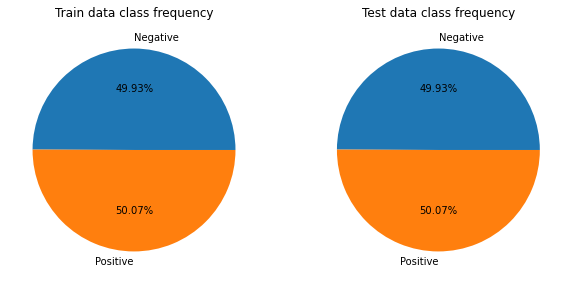

*************************************************
For training data
Liked
0        49.933066
1        50.066934
dtype: float64
****************************
For testing data
Liked
0        49.799197
1        50.200803
dtype: float64


In [16]:
freq = y_train.value_counts().sort_index().tolist()
label = ['Negative','Positive']
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.pie(freq, labels = label,autopct='%1.2f%%')
plt.title('Train data class frequency')

plt.subplot(1, 2, 2)
plt.pie(freq, labels = label,autopct='%1.2f%%')
plt.title('Test data class frequency')
plt.show()

print('*************************************************')
print('For training data')
print(y_train.value_counts().sort_index()/y_train.shape[0]*100)
print('****************************')
print('For testing data')
print(y_test.value_counts().sort_index()/y_test.shape[0]*100)

In [17]:
X_train.shape,X_test.shape

((747, 2000), (249, 2000))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Results for Gaussian naive bayes:-

Training time(sec) =  0.024014949798583984
Prediction time(sec) =  0.015000581741333008


Training score =  0.7872145202219323
Tesing score =  0.7671935483870967


No of missclassified for class Negative (test data) = 25 
No of missclassified for class Positive (test data) = 33 
Total no of missclassified points(test data) =  58
Total % of missclassified points(test data) =  0.23293172690763053


Confusion matrix:


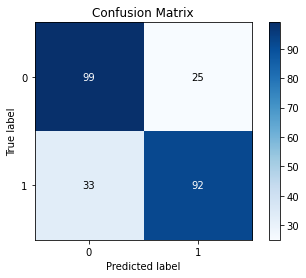



Classification report:-

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       124
           1       0.79      0.74      0.76       125

    accuracy                           0.77       249
   macro avg       0.77      0.77      0.77       249
weighted avg       0.77      0.77      0.77       249

**************************************************************************


In [19]:
from sklearn.naive_bayes import GaussianNB
mnb = GaussianNB(priors=[0.5,0.5])

print('Results for Gaussian naive bayes:-\n')
start_time = time.time()
mnb.fit(X_train,y_train)
mnb_time = (time.time() - start_time)
print('Training time(sec) = ',mnb_time)

y_pred1 = mnb.predict(X_train)

start_time = time.time()
y_pred = mnb.predict(X_test)
mnb_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',mnb_time2)


cm_mnb = confusion_matrix(y_test, y_pred)
mnb_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_mnb = balanced_accuracy_score(y_train,y_pred1)
acc2_mnb = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_mnb)
print('Tesing score = ',acc2_mnb)
print('\n')

for i in range(len(y_train['Liked'].unique())):
    err = np.sum(cm_mnb[i])-cm_mnb[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',mnb_miss)
print('Total % of missclassified points(test data) = ',mnb_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

MNB = [acc1_mnb,acc2_mnb,mnb_miss,mnb_miss/len(y_test),mnb_time,mnb_time2]

Results for Logistic regression:-

Training time(sec) =  4.674299955368042
Prediction time(sec) =  0.015218734741210938


Training score =  1.0
Tesing score =  0.7915161290322581


No of missclassified for class Negative (test data) = 15 
No of missclassified for class Positive (test data) = 37 
Total no of missclassified points(test data) =  52
Total % of missclassified points(test data) =  0.20883534136546184


Confusion matrix:


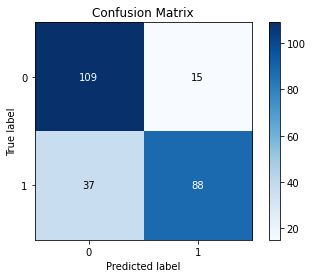



Classification report:-

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       124
           1       0.85      0.70      0.77       125

    accuracy                           0.79       249
   macro avg       0.80      0.79      0.79       249
weighted avg       0.80      0.79      0.79       249

**************************************************************************


In [20]:
lr=LogisticRegression(class_weight='balanced',n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('Training time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)

cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_lr)
print('Tesing score = ',acc2_lr)
print('\n')

for i in range(len(y_train['Liked'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
    
print('Total no of missclassified points(test data) = ',lr_miss)
print('Total % of missclassified points(test data) = ',lr_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

LR = [acc1_lr,acc2_lr,lr_miss,lr_miss/len(y_test),lr_time,lr_time2]

Results for Linear support vector machine:-

Training time(sec) =  4.0273401737213135
Prediction time(sec) =  0.0


Training score =  1.0
Tesing score =  0.7553548387096775


No of missclassified for class Negative (test data) = 15 
No of missclassified for class Positive (test data) = 37 
Total no of missclassified points(test data) =  61
Total % of missclassified points(test data) =  0.24497991967871485


Confusion matrix:


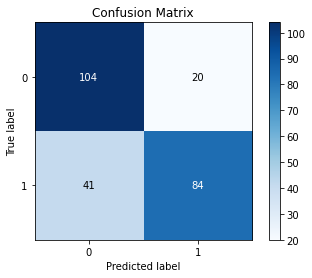



Classification report:-

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       124
           1       0.81      0.67      0.73       125

    accuracy                           0.76       249
   macro avg       0.76      0.76      0.75       249
weighted avg       0.76      0.76      0.75       249

**************************************************************************


In [21]:
from sklearn.svm import LinearSVC

cal_svc = LinearSVC(class_weight='balanced')

print('Results for Linear support vector machine:-\n')

start_time = time.time()
cal_svc.fit(X_train,y_train)
svc_time = (time.time() - start_time)
print('Training time(sec) = ',svc_time)

y_pred1 = cal_svc.predict(X_train)
start_time = time.time()
y_pred = cal_svc.predict(X_test)
svc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svc_time2)


cm_svc = confusion_matrix(y_test, y_pred)
svc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_svc = balanced_accuracy_score(y_train,y_pred1)
acc2_svc = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_svc)
print('Tesing score = ',acc2_svc)
print('\n')

for i in range(len(y_train['Liked'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',svc_miss)
print('Total % of missclassified points(test data) = ',svc_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

SVC = [acc1_svc,acc2_svc,svc_miss,svc_miss/len(y_test),svc_time,svc_time2]

Results for Decision Tree classifier:-

Training time(sec) =  0.9679396152496338
Prediction time(sec) =  0.0010013580322265625


Training score =  1.0
Tesing score =  0.5821612903225806


No of missclassified for class Negative (test data) = 15 
No of missclassified for class Positive (test data) = 37 
Total no of missclassified points(test data) =  104
Total % of missclassified points(test data) =  0.41767068273092367


Confusion matrix:


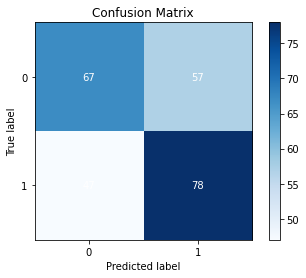



Classification report:-

              precision    recall  f1-score   support

           0       0.59      0.54      0.56       124
           1       0.58      0.62      0.60       125

    accuracy                           0.58       249
   macro avg       0.58      0.58      0.58       249
weighted avg       0.58      0.58      0.58       249

**************************************************************************


In [22]:
from sklearn.tree import DecisionTreeClassifier

cal_dt = DecisionTreeClassifier(class_weight='balanced')

print('Results for Decision Tree classifier:-\n')

start_time = time.time()
cal_dt.fit(X_train,y_train)
dt_time = (time.time() - start_time)
print('Training time(sec) = ',dt_time)

y_pred1 = cal_dt.predict(X_train)

start_time = time.time()
y_pred = cal_dt.predict(X_test)
dt_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dt_time2)


cm_dt = confusion_matrix(y_test, y_pred)
dt_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_dt = balanced_accuracy_score(y_train,y_pred1)
acc2_dt = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_dt)
print('Tesing score = ',acc2_dt)
print('\n')

for i in range(len(y_train['Liked'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',dt_miss)
print('Total % of missclassified points(test data) = ',dt_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')
DT = [acc1_dt,acc2_dt,dt_miss,dt_miss/len(y_test),dt_time,dt_time2]

Results for ExtraTrees classifier:-

Training time(sec) =  0.7692339420318604
Prediction time(sec) =  0.023999691009521484


Training score =  1.0
Tesing score =  0.7630967741935484


No of missclassified for class Negative (test data) = 15 
No of missclassified for class Positive (test data) = 37 
Total no of missclassified points(test data) =  59
Total % of missclassified points(test data) =  0.23694779116465864


Confusion matrix:


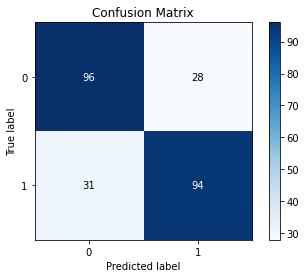



Classification report:-

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       124
           1       0.77      0.75      0.76       125

    accuracy                           0.76       249
   macro avg       0.76      0.76      0.76       249
weighted avg       0.76      0.76      0.76       249

**************************************************************************


In [23]:
from sklearn.ensemble import ExtraTreesClassifier

cal_dt = ExtraTreesClassifier(class_weight='balanced')

print('Results for ExtraTrees classifier:-\n')

start_time = time.time()
cal_dt.fit(X_train,y_train)
dt_time = (time.time() - start_time)
print('Training time(sec) = ',dt_time)

y_pred1 = cal_dt.predict(X_train)

start_time = time.time()
y_pred = cal_dt.predict(X_test)
dt_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dt_time2)


cm_dt = confusion_matrix(y_test, y_pred)
dt_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_dt = balanced_accuracy_score(y_train,y_pred1)
acc2_dt = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_dt)
print('Tesing score = ',acc2_dt)
print('\n')

for i in range(len(y_train['Liked'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',dt_miss)
print('Total % of missclassified points(test data) = ',dt_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')
e_tree = [acc1_dt,acc2_dt,dt_miss,dt_miss/len(y_test),dt_time,dt_time2]

In [24]:
s1=[MNB,LR,SVC,DT,e_tree]
s2=['GNB','LR','SVC','DT','E_tree']
col=['Train score','Test score','Missclassified-point','% missclasification','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

In [25]:
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})

In [26]:
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Training time,Prediction time
0,GNB,0.787215,0.767194,58,0.232932,0.024015,0.015001
1,LR,1.000000,0.791516,52,0.208835,4.674300,0.015219
2,SVC,1.000000,0.755355,61,0.244980,4.027340,0.000000
3,DT,1.000000,0.582161,104,0.417671,0.967940,0.001001
4,E_tree,1.000000,0.763097,59,0.236948,0.769234,0.024000


#### Using tfidf-W2V

In [27]:
X = df.iloc[:,df.columns!='Liked']
y = df.iloc[:,df.columns=='Liked']

#Using stratify = y so that ratio of class label is same in both training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25 , stratify=y, random_state=99)

train_corpus = X_train.Review.values.tolist()
test_corpus = X_test.Review.values.tolist()

train_corpus = [sent.split() for sent in train_corpus]
test_corpus = [sent.split() for sent in test_corpus]

X_train.shape,X_test.shape

((747, 1), (249, 1))

In [28]:
X_train = X_train.values.ravel()
X_test = X_test.values.ravel()

vec = TfidfVectorizer(lowercase=True)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [29]:
from gensim.models.word2vec import Word2Vec
start_time = time.time()

model1 = Word2Vec(train_corpus,min_count=1,size=300, workers=8 ,window=2)
model2 = Word2Vec(test_corpus,min_count=1,size=300, workers=8,window=2)

print('Total time(sec) = ',(time.time() - start_time))

Total time(sec) =  1.1196186542510986


In [30]:
d = dict(zip(vec.get_feature_names(), list(vec.idf_)))

In [31]:
d

{'10': 6.007965065540377,
 '100': 6.518790689306368,
 '1199': 6.924255797414532,
 '12': 6.231108616854587,
 '15': 6.518790689306368,
 '17': 6.924255797414532,
 '1979': 6.924255797414532,
 '20': 6.007965065540377,
 '2007': 6.924255797414532,
 '23': 6.924255797414532,
 '30': 5.825643508746422,
 '34th': 6.924255797414532,
 '35': 6.231108616854587,
 '40': 6.007965065540377,
 '400': 6.924255797414532,
 '70': 6.924255797414532,
 '785': 6.924255797414532,
 '90': 6.924255797414532,
 'absolute': 6.924255797414532,
 'absolutely': 5.671492828919164,
 'absolutley': 6.924255797414532,
 'accident': 6.924255797414532,
 'accommodation': 6.924255797414532,
 'accomodate': 6.924255797414532,
 'accordingly': 6.924255797414532,
 'accountant': 6.924255797414532,
 'ache': 6.924255797414532,
 'acknowledge': 6.518790689306368,
 'actual': 6.924255797414532,
 'actually': 6.518790689306368,
 'add': 6.924255797414532,
 'affordable': 6.924255797414532,
 'afternoon': 6.924255797414532,
 'ago': 6.518790689306368,
 'a

In [32]:
def tfidf_w2v(corpus,model,d,alpha=1):
    data = []
    
    for i in corpus:
        l1 = []
        l2 = []
        for j in i:
            
            if j in d.keys():
                l1.append((d[j]*(i.count(j)))+alpha)
            else:
                l1.append(alpha)
                
            l2.append(model.wv[j])
            
        l1 = np.array(l1)
        l2 = np.array(l2)
        
        result = (np.dot(l1,l2))/(np.sum(l1)+(len(l1)*alpha))
        
        data.append(result)
        
    return np.array(data)

In [33]:
train_data = tfidf_w2v(train_corpus,model1,d,1)
test_data = tfidf_w2v(test_corpus,model2,d,1)

In [34]:
train_data.shape,test_data.shape

((747, 300), (249, 300))

In [35]:
X_train = train_data
X_test = test_data

In [36]:
X_train.shape,X_test.shape

((747, 300), (249, 300))

In [37]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

Results for Gaussian naive bayes:-

Training time(sec) =  0.007999897003173828
Prediction time(sec) =  0.0009999275207519531


Training score =  0.7444086823127984
Tesing score =  0.6949032258064516


No of missclassified for class Negative (test data) = 34 
No of missclassified for class Positive (test data) = 42 
Total no of missclassified points(test data) =  76
Total % of missclassified points(test data) =  0.30522088353413657


Confusion matrix:


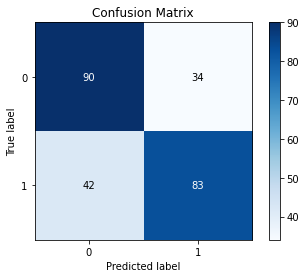



Classification report:-

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       124
           1       0.71      0.66      0.69       125

    accuracy                           0.69       249
   macro avg       0.70      0.69      0.69       249
weighted avg       0.70      0.69      0.69       249

**************************************************************************


In [38]:
from sklearn.naive_bayes import GaussianNB
mnb = GaussianNB(priors=[0.5,0.5])

print('Results for Gaussian naive bayes:-\n')
start_time = time.time()
mnb.fit(X_train,y_train)
mnb_time = (time.time() - start_time)
print('Training time(sec) = ',mnb_time)

y_pred1 = mnb.predict(X_train)

start_time = time.time()
y_pred = mnb.predict(X_test)
mnb_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',mnb_time2)


cm_mnb = confusion_matrix(y_test, y_pred)
mnb_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_mnb = balanced_accuracy_score(y_train,y_pred1)
acc2_mnb = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_mnb)
print('Tesing score = ',acc2_mnb)
print('\n')

for i in range(len(y_train['Liked'].unique())):
    err = np.sum(cm_mnb[i])-cm_mnb[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',mnb_miss)
print('Total % of missclassified points(test data) = ',mnb_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

MNB = [acc1_mnb,acc2_mnb,mnb_miss,mnb_miss/len(y_test),mnb_time,mnb_time2]

Results for Logistic regression:-

Training time(sec) =  2.7128045558929443
Prediction time(sec) =  0.0


Training score =  0.7643653854425027
Tesing score =  0.6745806451612903


No of missclassified for class Negative (test data) = 44 
No of missclassified for class Positive (test data) = 37 
Total no of missclassified points(test data) =  81
Total % of missclassified points(test data) =  0.3253012048192771


Confusion matrix:


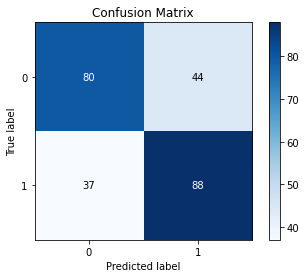



Classification report:-

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       124
           1       0.67      0.70      0.68       125

    accuracy                           0.67       249
   macro avg       0.68      0.67      0.67       249
weighted avg       0.68      0.67      0.67       249

**************************************************************************


In [39]:


lr=LogisticRegression(class_weight='balanced',n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('Training time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)

cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_lr)
print('Tesing score = ',acc2_lr)
print('\n')

for i in range(len(y_train['Liked'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
    
print('Total no of missclassified points(test data) = ',lr_miss)
print('Total % of missclassified points(test data) = ',lr_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

LR = [acc1_lr,acc2_lr,lr_miss,lr_miss/len(y_test),lr_time,lr_time2]

Results for Linear support vector machine:-

Training time(sec) =  0.05020618438720703
Prediction time(sec) =  0.0006327629089355469


Training score =  0.7630284870467807
Tesing score =  0.6786129032258064


No of missclassified for class Negative (test data) = 44 
No of missclassified for class Positive (test data) = 37 
Total no of missclassified points(test data) =  80
Total % of missclassified points(test data) =  0.321285140562249


Confusion matrix:


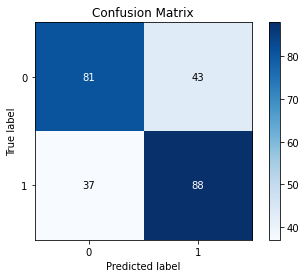



Classification report:-

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       124
           1       0.67      0.70      0.69       125

    accuracy                           0.68       249
   macro avg       0.68      0.68      0.68       249
weighted avg       0.68      0.68      0.68       249

**************************************************************************


In [40]:
from sklearn.svm import LinearSVC

cal_svc = LinearSVC(class_weight='balanced')

print('Results for Linear support vector machine:-\n')

start_time = time.time()
cal_svc.fit(X_train,y_train)
svc_time = (time.time() - start_time)
print('Training time(sec) = ',svc_time)

y_pred1 = cal_svc.predict(X_train)
start_time = time.time()
y_pred = cal_svc.predict(X_test)
svc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svc_time2)


cm_svc = confusion_matrix(y_test, y_pred)
svc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_svc = balanced_accuracy_score(y_train,y_pred1)
acc2_svc = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_svc)
print('Tesing score = ',acc2_svc)
print('\n')

for i in range(len(y_train['Liked'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',svc_miss)
print('Total % of missclassified points(test data) = ',svc_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

SVC = [acc1_svc,acc2_svc,svc_miss,svc_miss/len(y_test),svc_time,svc_time2]

Results for Decision Tree classifier:-

Training time(sec) =  0.17257332801818848
Prediction time(sec) =  0.0


Training score =  1.0
Tesing score =  0.5944193548387097


No of missclassified for class Negative (test data) = 44 
No of missclassified for class Positive (test data) = 37 
Total no of missclassified points(test data) =  101
Total % of missclassified points(test data) =  0.40562248995983935


Confusion matrix:


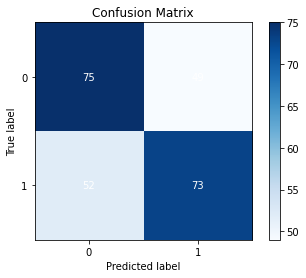



Classification report:-

              precision    recall  f1-score   support

           0       0.59      0.60      0.60       124
           1       0.60      0.58      0.59       125

    accuracy                           0.59       249
   macro avg       0.59      0.59      0.59       249
weighted avg       0.59      0.59      0.59       249

**************************************************************************


In [41]:
from sklearn.tree import DecisionTreeClassifier

cal_dt = DecisionTreeClassifier(class_weight='balanced')

print('Results for Decision Tree classifier:-\n')

start_time = time.time()
cal_dt.fit(X_train,y_train)
dt_time = (time.time() - start_time)
print('Training time(sec) = ',dt_time)

y_pred1 = cal_dt.predict(X_train)

start_time = time.time()
y_pred = cal_dt.predict(X_test)
dt_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dt_time2)


cm_dt = confusion_matrix(y_test, y_pred)
dt_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_dt = balanced_accuracy_score(y_train,y_pred1)
acc2_dt = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_dt)
print('Tesing score = ',acc2_dt)
print('\n')

for i in range(len(y_train['Liked'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',dt_miss)
print('Total % of missclassified points(test data) = ',dt_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')
DT = [acc1_dt,acc2_dt,dt_miss,dt_miss/len(y_test),dt_time,dt_time2]

Results for ExtraTrees classifier:-

Training time(sec) =  0.34751057624816895
Prediction time(sec) =  0.015411615371704102


Training score =  1.0
Tesing score =  0.7348709677419355


No of missclassified for class Negative (test data) = 44 
No of missclassified for class Positive (test data) = 37 
Total no of missclassified points(test data) =  66
Total % of missclassified points(test data) =  0.26506024096385544


Confusion matrix:


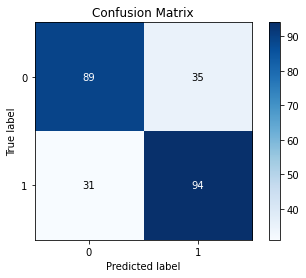



Classification report:-

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       124
           1       0.73      0.75      0.74       125

    accuracy                           0.73       249
   macro avg       0.74      0.73      0.73       249
weighted avg       0.74      0.73      0.73       249

**************************************************************************


In [42]:
from sklearn.ensemble import ExtraTreesClassifier

cal_dt = ExtraTreesClassifier(class_weight='balanced')

print('Results for ExtraTrees classifier:-\n')

start_time = time.time()
cal_dt.fit(X_train,y_train)
dt_time = (time.time() - start_time)
print('Training time(sec) = ',dt_time)

y_pred1 = cal_dt.predict(X_train)

start_time = time.time()
y_pred = cal_dt.predict(X_test)
dt_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dt_time2)


cm_dt = confusion_matrix(y_test, y_pred)
dt_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_dt = balanced_accuracy_score(y_train,y_pred1)
acc2_dt = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_dt)
print('Tesing score = ',acc2_dt)
print('\n')

for i in range(len(y_train['Liked'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',dt_miss)
print('Total % of missclassified points(test data) = ',dt_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')
e_tree = [acc1_dt,acc2_dt,dt_miss,dt_miss/len(y_test),dt_time,dt_time2]

In [43]:
s1=[MNB,LR,SVC,DT,e_tree]
s2=['MNB','LR','SVC','DT','E_tree']
col=['Train score','Test score','Missclassified-point','% missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]

In [44]:
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})

In [45]:
result2

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Training time,Prediction time
0,MNB,0.744409,0.694903,76,0.305221,0.008000,0.001000
1,LR,0.764365,0.674581,81,0.325301,2.712805,0.000000
2,SVC,0.763028,0.678613,80,0.321285,0.050206,0.000633
3,DT,1.000000,0.594419,101,0.405622,0.172573,0.000000
4,E_tree,1.000000,0.734871,66,0.265060,0.347511,0.015412


In [46]:
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Training time,Prediction time
0,GNB,0.787215,0.767194,58,0.232932,0.024015,0.015001
1,LR,1.000000,0.791516,52,0.208835,4.674300,0.015219
2,SVC,1.000000,0.755355,61,0.244980,4.027340,0.000000
3,DT,1.000000,0.582161,104,0.417671,0.967940,0.001001
4,E_tree,1.000000,0.763097,59,0.236948,0.769234,0.024000
